# Challenge Description

You are looking at data from an e-commerce website. The site is very simple and has just 4
pages:
    The first page is the home page. When you come to the site for the first time, you can
    only land on the homepage as a first page.
    
    From the home page, the user can perform a search and land on the search page.
    
    From the search page, if the user clicks on a product, she will get to the payment page,
    where she is asked to provide payment information in order to buy that product.
    
    If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the volume of sales and, especially, of sales coming
from new users. Therefore, she asked you to investigate whether there is something wrong in
the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
Specifically, she is interested in :

    A full picture of funnel conversion rate for both desktop and mobile
    Some insights on what the product team should focus on in order to improve
    conversion rate as well as anything you might discover that could help improve conversion rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
user_table = pd.read_csv('user_table.csv')
homepage_table = pd.read_csv('home_page_table.csv')
searchpage_table = pd.read_csv('search_page_table.csv')
paymentpage_table = pd.read_csv('payment_page_table.csv')
paymentconfirm_table = pd.read_csv('payment_confirmation_table.csv')

In [6]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [7]:
user_table.describe()

,user_id
count,90400.000000
mean,498709.683473
std,289040.674085
min,17.000000
25%,247978.750000
50%,498267.000000
75%,749789.250000
max,999979.000000


In [8]:
user_table[['date', 'device', 'sex']].describe()

,date,device,sex
count,90400,90400,90400
unique,120,2,2
top,2015-02-08,Desktop,Male
freq,877,60200,45325


In [10]:
homepage_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [11]:
homepage_table.sample(5)

,user_id,page
54550,605397,home_page
39492,990531,home_page
9766,103963,home_page
56050,585422,home_page
48707,467297,home_page


In [12]:
homepage_table.page.unique()

array(['home_page'], dtype=object)

In [13]:
searchpage_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB


In [14]:
searchpage_table.sample()

,user_id,page
10293,395808,search_page


In [15]:
searchpage_table.page.unique()

array(['search_page'], dtype=object)

In [16]:
paymentpage_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [17]:
paymentconfirm_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
user_id    452 non-null int64
page       452 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [19]:
merger = [user_table, homepage_table, searchpage_table, paymentpage_table, paymentconfirm_table]

In [26]:
from functools import reduce

merge_table = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), merger)

In [27]:
merge_table.sample(5)

,user_id,date,device,sex,page_x,page_y,page_x,page_y
70414,460438,2015-01-26,Desktop,Male,home_page,NaN,NaN,NaN
12347,393440,2015-03-29,Desktop,Male,home_page,search_page,NaN,NaN
84452,483724,2015-03-21,Mobile,Male,home_page,NaN,NaN,NaN
82974,508798,2015-04-03,Mobile,Male,home_page,NaN,NaN,NaN
61520,117185,2015-04-26,Mobile,Female,home_page,NaN,NaN,NaN


In [28]:
merge_table.columns = ['user_id', 'date', 'device', 'sex', 'funnel1', 'funnel2', 'funnel3', 'funnel4']

In [29]:
merge_table.sample(5)

,user_id,date,device,sex,funnel1,funnel2,funnel3,funnel4
46938,766828,2015-04-06,Mobile,Female,home_page,search_page,NaN,NaN
77314,734626,2015-03-03,Desktop,Male,home_page,search_page,NaN,NaN
46895,937069,2015-02-11,Mobile,Male,home_page,NaN,NaN,NaN
29056,392784,2015-03-09,Mobile,Male,home_page,search_page,payment_page,NaN
27186,769146,2015-04-01,Desktop,Male,home_page,search_page,NaN,NaN


In [37]:
merge_table.count()/merge_table.user_id.count()

user_id    1.000000
date       1.000000
device     1.000000
sex        1.000000
funnel1    1.000000
funnel2    0.500000
funnel3    0.066704
funnel4    0.005000
dtype: float64

In [38]:
merge_table.device.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [153]:
funnel = {}
for each in merge_table.device.unique():
    funnel[each] = merge_table[merge_table.device == each][['funnel1','funnel2','funnel3','funnel4']].count()/merge_table.user_id.count()
    print('Funnel conversion rate for customer group using ', each, ':\n',merge_table[merge_table.device == each][['funnel1','funnel2','funnel3','funnel4']].count()/merge_table.user_id.count())
    

Funnel conversion rate for customer group using  Desktop :
 funnel1    0.665929
funnel2    0.332965
funnel3    0.033296
funnel4    0.001659
dtype: float64
Funnel conversion rate for customer group using  Mobile :
 funnel1    0.334071
funnel2    0.167035
funnel3    0.033407
funnel4    0.003341
dtype: float64


(0.0, 0.7)

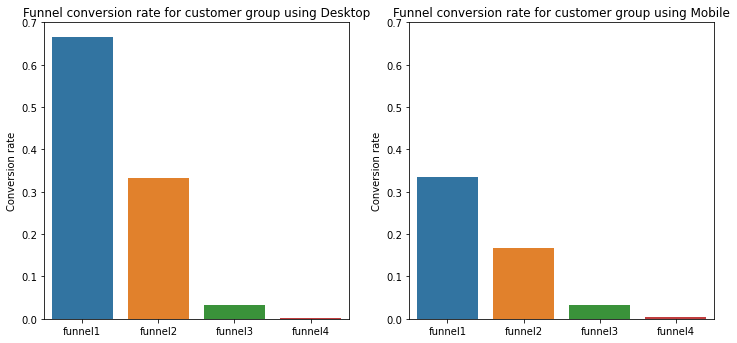

In [154]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.barplot(funnel['Desktop'].index, funnel['Desktop'].values)
plt.title('Funnel conversion rate for customer group using Desktop')
plt.ylabel('Conversion rate')
plt.ylim(0,0.7)
plt.subplot(2,2,2)
sns.barplot(funnel['Mobile'].index, funnel['Mobile'].values)
plt.title('Funnel conversion rate for customer group using Mobile')
plt.ylabel('Conversion rate')
plt.ylim(0,0.7)


In [155]:
funnelm_prep=pd.DataFrame({'funnel':funnel['Mobile'].index,'conversion':funnel['Mobile'].values, 'device': 'Mobile'})
funneld_prep=pd.DataFrame({'funnel':funnel['Desktop'].index,'conversion':funnel['Desktop'].values, 'device': 'Desktop'})

In [156]:
temp = [funnelm_prep, funneld_prep]
funnel_prep=pd.concat(temp)

In [98]:
funnel_prep.sample(6)

,funnel,conversion,device
1,funnel2,0.167035,Mobile
0,funnel1,0.665929,Desktop
2,funnel3,0.033407,Mobile
3,funnel4,0.003341,Mobile
2,funnel3,0.033296,Desktop
0,funnel1,0.334071,Mobile


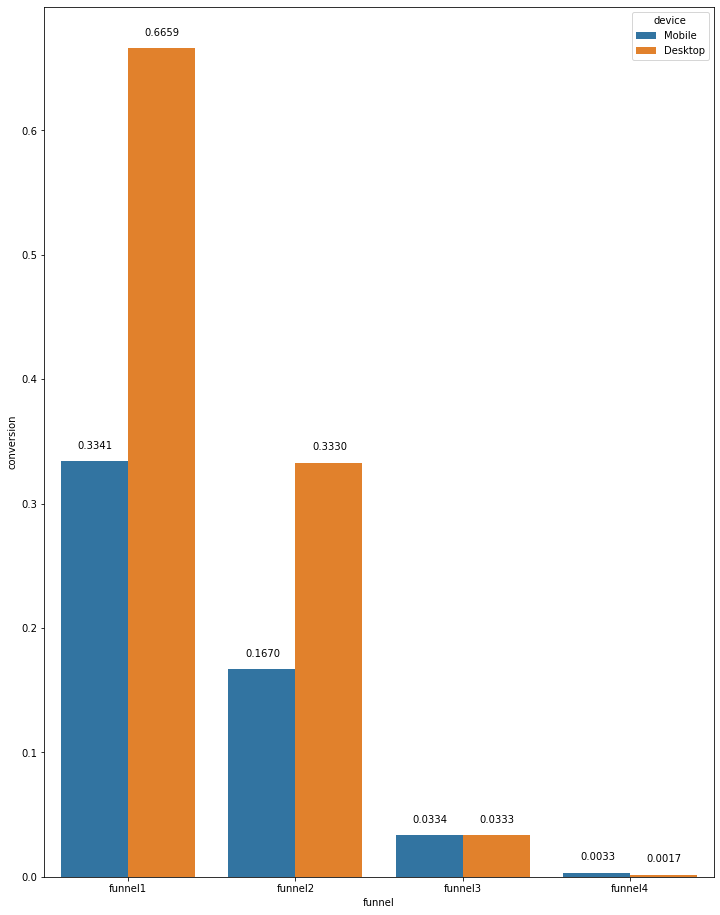

In [115]:
plt.figure(figsize=(12,16))
splot = sns.barplot(x='funnel', y='conversion', hue='device', data=funnel_prep)
for each in splot.patches:
    splot.annotate(format(each.get_height(), '.4f'), (each.get_x() + each.get_width()/4, each.get_height()+0.01))

## Mobile has better retention rate through the funnel
## Desktop has almost doubled user visited the home page
## Mobile user has better final purchase rate

In [158]:
funnel_prep.loc[(funnel_prep['device'] == 'Mobile') & (funnel_prep['funnel'] == 'funnel1'),'conversion']

0    0.334071
Name: conversion, dtype: float64

In [206]:
for i in funnel_prep.device.unique():
    j_pre = 'funnel1'
    for j in funnel_prep.funnel.unique():         
        funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j), 'conversion']
        funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j), 'retention'] = \
        funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j), 'conversion']\
        .tolist()[0]/funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j_pre), 'conversion']\
        .tolist()[0]
        print(funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j_pre), 'conversion'].tolist())
        print(funnel_prep.loc[(funnel_prep['device'] == i) & (funnel_prep['funnel'] == j), 'conversion'].tolist())
        j_pre = j

funnel_prep.retention

[0.334070796460177]
[0.334070796460177]
[0.334070796460177]
[0.1670353982300885]
[0.1670353982300885]
[0.0334070796460177]
[0.0334070796460177]
[0.00334070796460177]
[0.665929203539823]
[0.665929203539823]
[0.665929203539823]
[0.3329646017699115]
[0.3329646017699115]
[0.03329646017699115]
[0.03329646017699115]
[0.00165929203539823]


0    1.000000
1    0.500000
2    0.200000
3    0.100000
0    1.000000
1    0.500000
2    0.100000
3    0.049834
Name: retention, dtype: float64

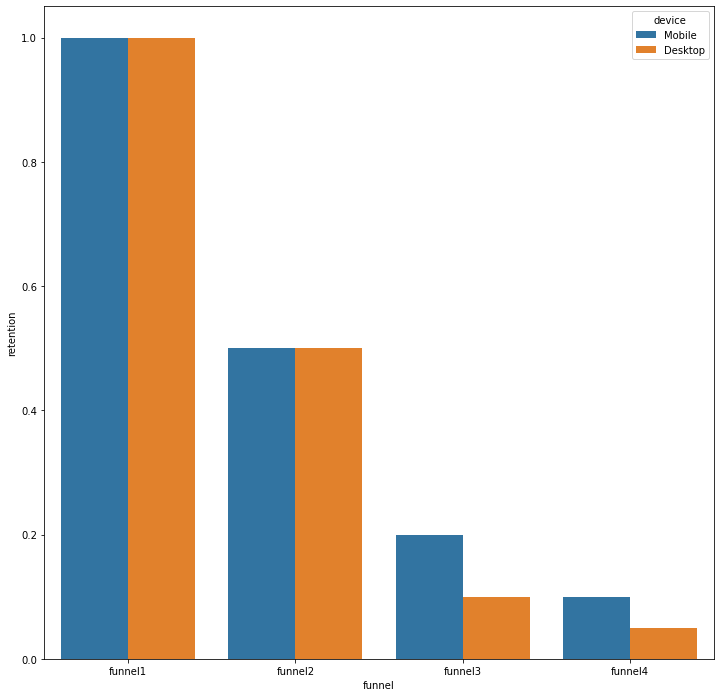

In [207]:
plt.figure(figsize=(12,12))
sns.barplot(x='funnel', y='retention', hue='device', data=funnel_prep)
plt.title('retention rate through different funnel levels')

## The Mobile and Desktop users have similar retention rate through the first two funnels. Howeve the Mobile has almost doubled retention rate in the later funnels: from search paget to payment page and from payment page to payment confirm page.

In [117]:
funnel = {}
for each in merge_table.sex.unique():
    funnel[each] = merge_table[merge_table.sex == each][['funnel1','funnel2','funnel3','funnel4']].count()/merge_table.user_id.count()
    print('Funnel conversion rate for', each, 'customers:\n',merge_table[merge_table.sex == each][['funnel1','funnel2','funnel3','funnel4']].count()/merge_table.user_id.count())
    

Funnel conversion rate for Female customers:
 funnel1    0.498617
funnel2    0.250841
funnel3    0.034292
funnel4    0.002666
dtype: float64
Funnel conversion rate for Male customers:
 funnel1    0.501383
funnel2    0.249159
funnel3    0.032412
funnel4    0.002334
dtype: float64


In [118]:
funnelm_prep=pd.DataFrame({'funnel':funnel['Female'].index,'conversion':funnel['Female'].values, 'sex': 'Female'})
funneld_prep=pd.DataFrame({'funnel':funnel['Male'].index,'conversion':funnel['Male'].values, 'sex': 'Male'})

In [119]:
temp = [funnelm_prep, funneld_prep]
funnel_prep=pd.concat(temp)

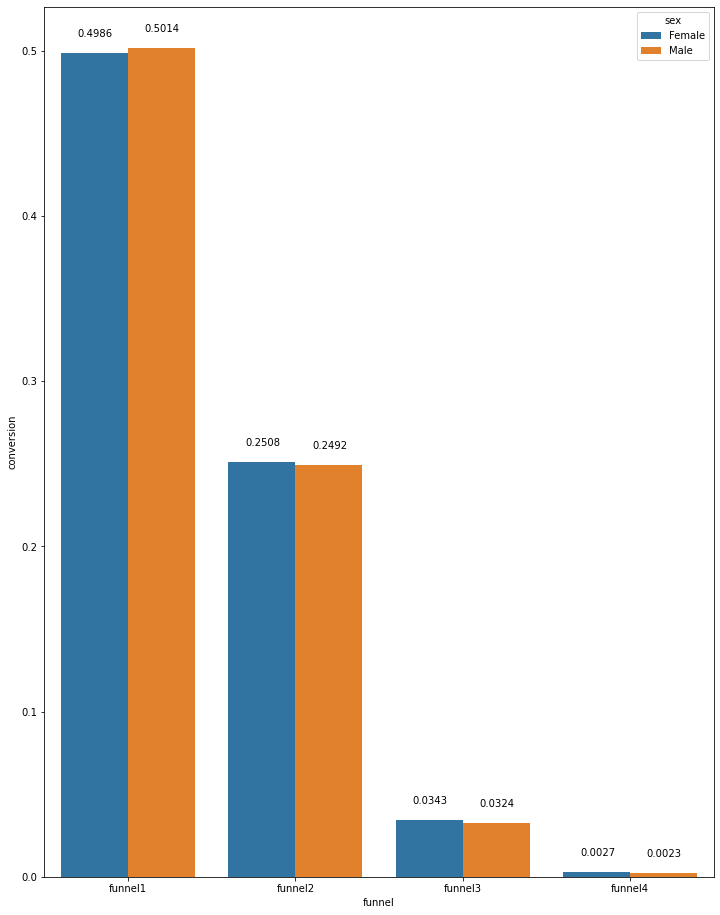

In [120]:
plt.figure(figsize=(12,16))
splot = sns.barplot(x='funnel', y='conversion', hue='sex', data=funnel_prep)
for each in splot.patches:
    splot.annotate(format(each.get_height(), '.4f'), (each.get_x() + each.get_width()/4, each.get_height()+0.01))

## The customer gender is uniformly distributed through different funnel stage

In [123]:
throughput=merge_table.loc[merge_table['funnel4'].notna()]

In [126]:
throughput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 61 to 90343
Data columns (total 8 columns):
user_id    452 non-null int64
date       452 non-null object
device     452 non-null object
sex        452 non-null object
funnel1    452 non-null object
funnel2    452 non-null object
funnel3    452 non-null object
funnel4    452 non-null object
dtypes: int64(1), object(7)
memory usage: 31.8+ KB


In [129]:
len(throughput.user_id.unique())

452

## There is no repeated user_id in the list
## let's take a look of the relationship between date and the conversion rate on the day

In [134]:
date_group=throughput.groupby(['date'])['user_id'].count()

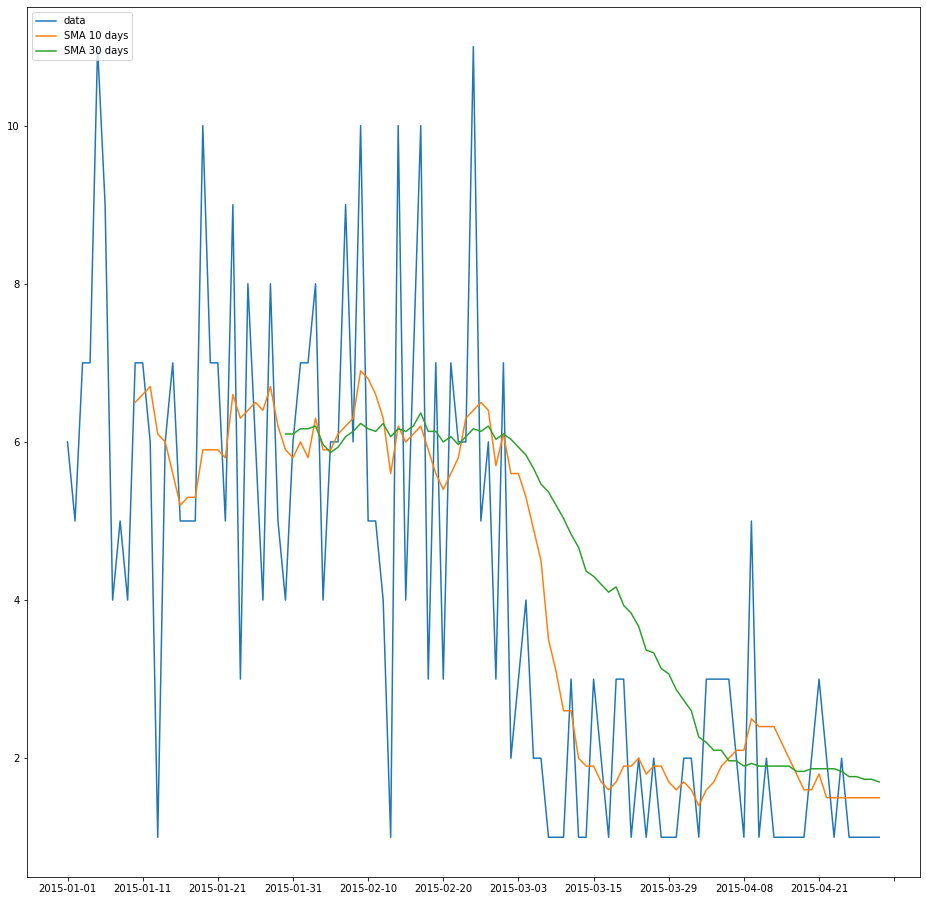

In [148]:
import matplotlib.ticker as ticker

plt.figure(figsize=(16,16))
ma_10 = date_group.rolling(window=10).mean()
ma_30 = date_group.rolling(window=30).mean()
ax=sns.lineplot(data=date_group, label='data')
sns.lineplot(data=ma_10, label='SMA 10 days')
sns.lineplot(data=ma_30, label='SMA 30 days')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.legend(loc=2)

## We see an over all conversion drop after about 2 months, i.e. from 2015-3 on.

In [222]:
throughput['date'] = pd.to_datetime(throughput['date'])
throughput['week'] = throughput['date'].dt.week
throughput['dayofweek'] = throughput['date'].dt.dayofweek
throughput.sample(5)

b:\program files\phthon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
b:\program files\phthon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
b:\program files\phthon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,user_id,date,device,sex,funnel1,funnel2,funnel3,funnel4,week,day,dayofweek
44226,287132,2015-03-08,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page,10,8,6
46728,971840,2015-04-27,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page,18,27,0
46388,409001,2015-02-17,Desktop,Female,home_page,search_page,payment_page,payment_confirmation_page,8,17,1
8656,622779,2015-02-14,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page,7,14,5
34541,812258,2015-01-19,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page,4,19,0


Text(0.5, 1.0, 'throughput count per week')

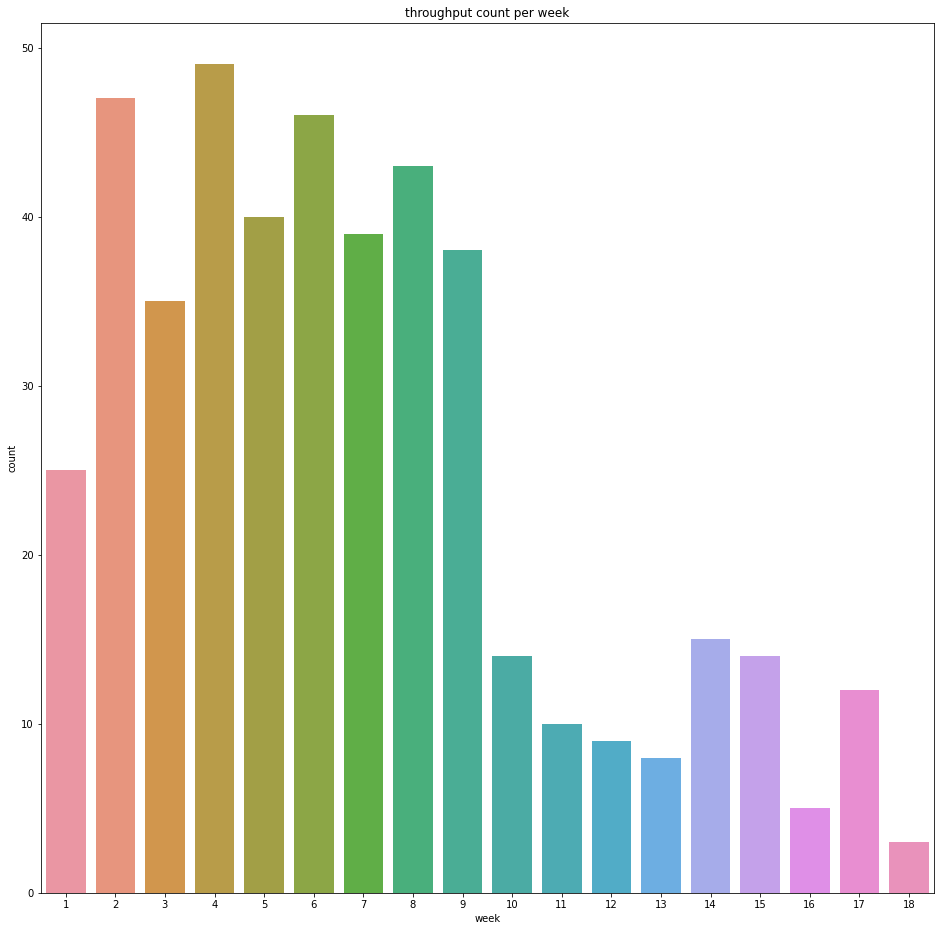

In [223]:
plt.figure(figsize=(16,16))
sns.countplot(throughput.week)
plt.title('throughput count per week')

Text(0.5, 1.0, 'throughput count per dayofweek')

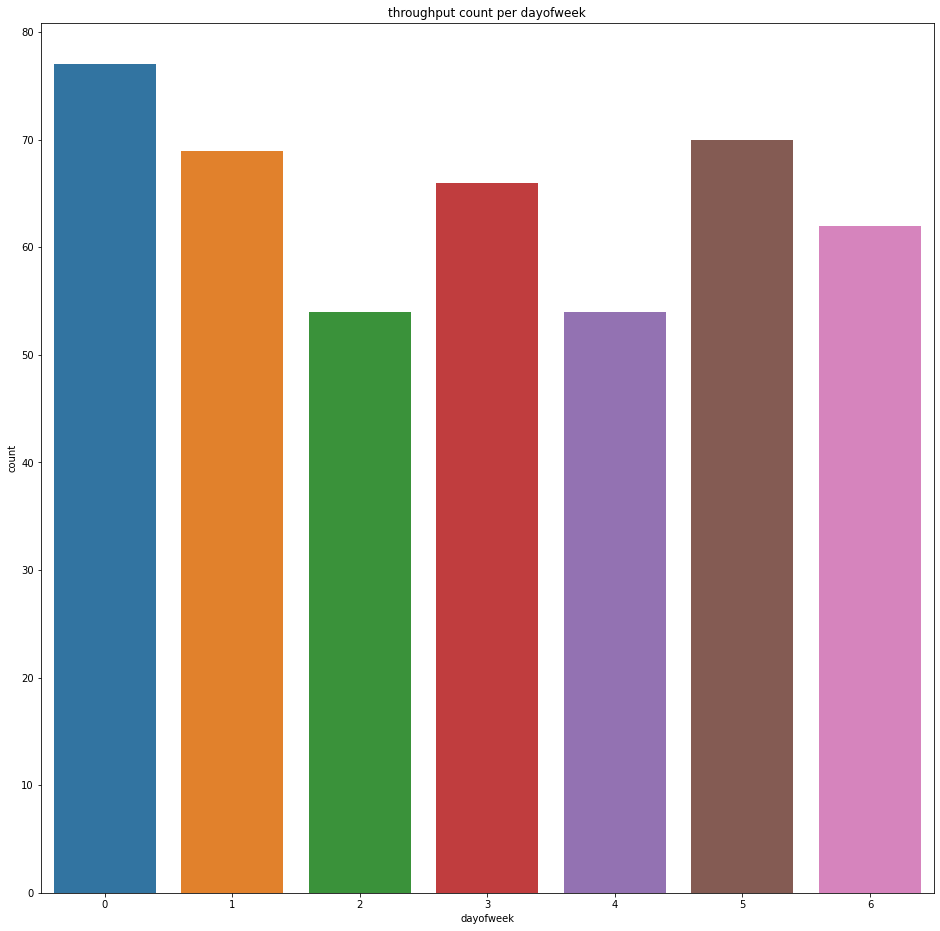

In [224]:
plt.figure(figsize=(16,16))
sns.countplot(throughput.dayofweek)
plt.title('throughput count per dayofweek')

## There is no obvious trend and cycles in the overall conversion rate in terms of week and day of week.

## To sum up:
1, The conversion rate has drop significantly after 2015-3, need to dig deep on what has changed after that date.
2, The overall conversion rate on Mobile devices is much higher than on Desktops especially after search page funnel, need to either improve the user experience on Desktop or increase the traffic on the Mobile devices.